# DIABETES CLASSIFICATION

**IMPORTING MODULES AND LOAD DATA SET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('diabetes.csv')

**DATA EXPLORATION**

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [4]:
#Finding the shape
data.shape

(2000, 9)

In [5]:
#Data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
#statitical data
data.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

**DATA VISUALIZATION**

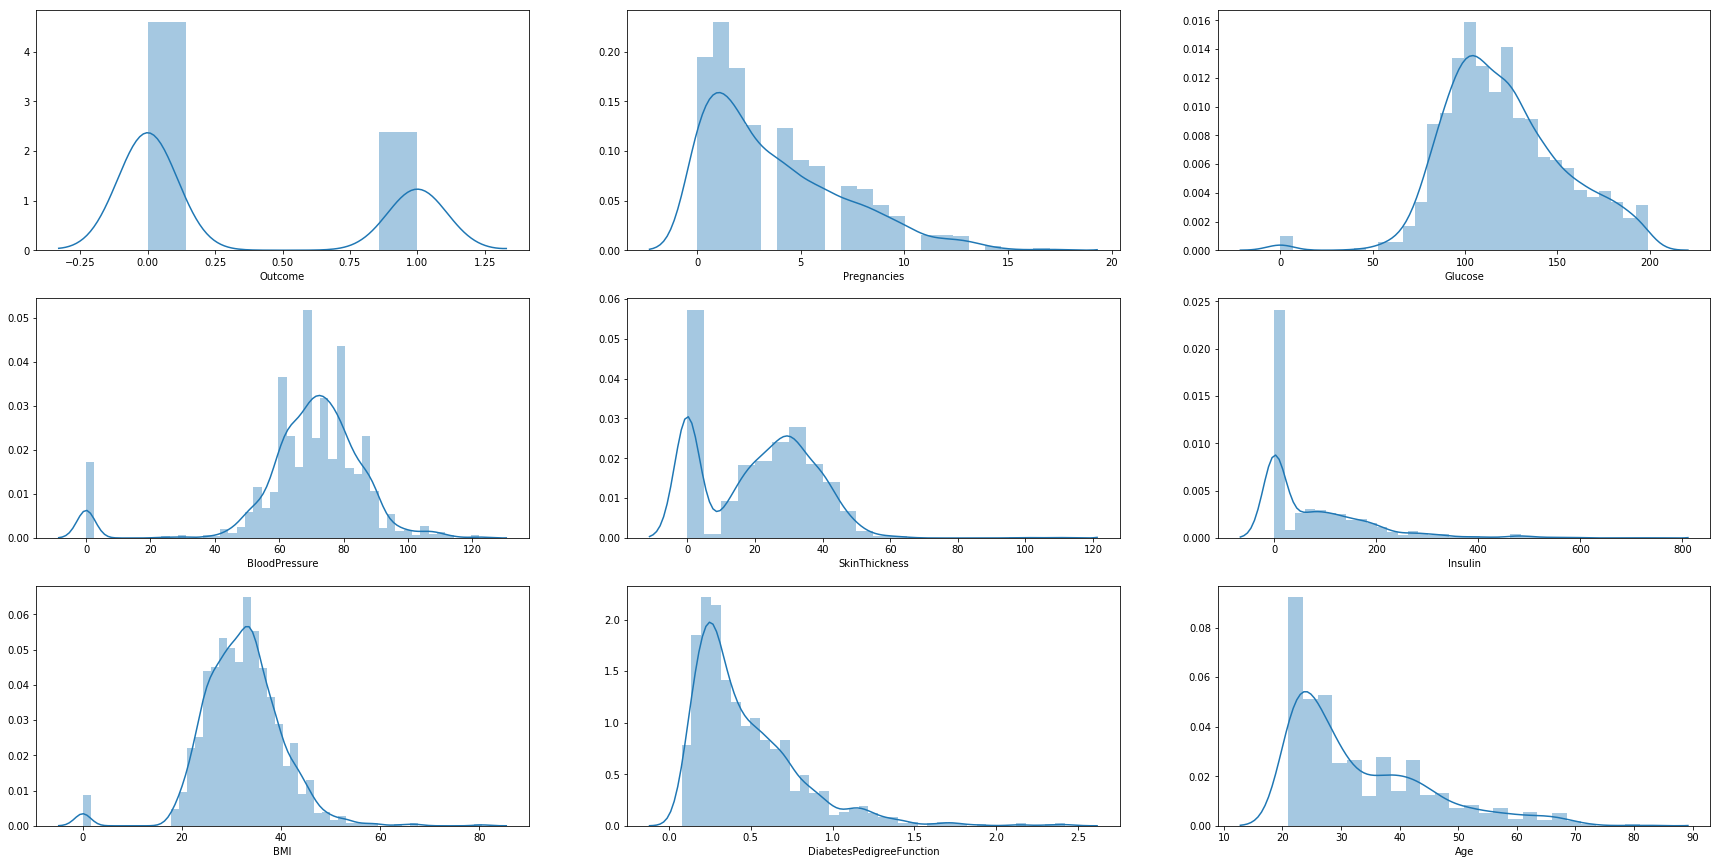

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.distplot(data['Outcome'])
plt.subplot(3,3,2)
sns.distplot(data['Pregnancies'])
plt.subplot(3,3,3)
sns.distplot(data['Glucose'])
plt.subplot(3,3,4)
sns.distplot(data['BloodPressure'])
plt.subplot(3,3,5)
sns.distplot(data['SkinThickness'])
plt.subplot(3,3,6)
sns.distplot(data['Insulin'])
plt.subplot(3,3,7)
sns.distplot(data['BMI'])
plt.subplot(3,3,8)
sns.distplot(data['DiabetesPedigreeFunction'])
plt.subplot(3,3,9)
sns.distplot(data['Age'])
plt.show()

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

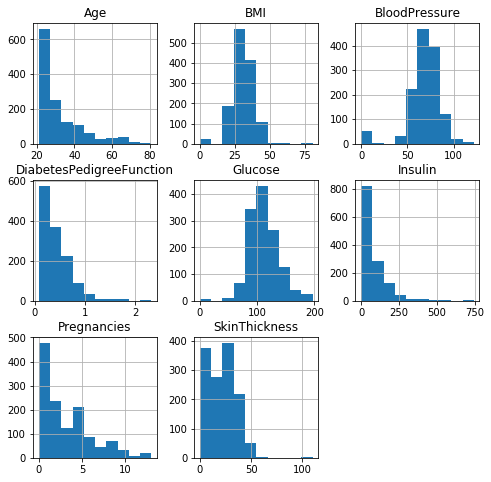

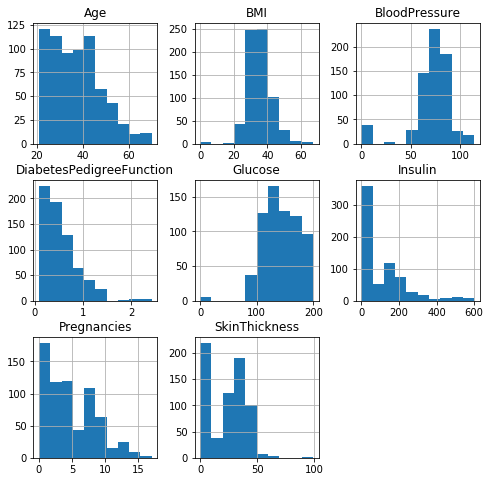

In [8]:
# histograms for the for the two responses separately
data.groupby('Outcome').hist(figsize=(8, 8))

**DATA PREPROCESSING**

In [9]:
#Checking for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**DATA PREPARATION**

In [10]:
#assigning the variables to features and target
# X is features and y is target
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [11]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  
0                     0.127   47  
1                     0.233   23  
2                     0.630   31  
3                     0.365   24  
4                     0.536   21

In [12]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [13]:
y.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

**SCALING FEATURES**

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

features_minmax_transform = pd.DataFrame(data = X)
features_minmax_transform[numerical] = scaler.fit_transform(X[numerical])

# Sample of records
display(features_minmax_transform.head(n = 5))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1     0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2     0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3     0.000000  0.678392       0.557377       0.381818  0.336022  0.524814   
4     0.058824  0.698492       0.508197       0.372727  0.645161  0.504963   

   DiabetesPedigreeFunction       Age  
0                  0.020922  0.433333  
1                  0.066183  0.033333  
2                  0.235696  0.166667  
3                  0.122545  0.050000  
4                  0.195559  0.000000

**SPLIT DATA**

In [15]:
#Splitting of data into training & testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1600 samples.
Testing set has 400 samples.


**BENCHMARK MODEL**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
#Create an object to classifier
lr=LogisticRegression(random_state=6)
#fitting the object to training data
lr.fit(X_train,y_train)
#predicting using testing data
y_pred=lr.predict(X_test)
#Calculating the f score
print("f score for logistic regression:",fbeta_score(y_test,y_pred,beta=0.5))

f score for logistic regression: 0.6684981684981686


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**TRYING OUT OTHER MODELS**

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=6)
dt.fit(X_train,y_train)
y_pred1=dt.predict(X_test)
print("f score for decision tree classifier:",fbeta_score(y_test,y_pred1,beta=0.5))

f score for decision tree classifier: 0.9677419354838709


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knnclf=KNeighborsClassifier()
knnclf.fit(X_train,y_train)
y_pred2=knnclf.predict(X_test)
print("f score for K Neighbors classifier:",fbeta_score(y_test, y_pred2, beta=0.5))

f score for K Neighbors classifier: 0.7000000000000001


In [19]:
from sklearn.svm import SVC
svmclf=SVC(random_state=0)
svmclf.fit(X_train,y_train)
y_pred3=svmclf.predict(X_test)
print("f score for SVC:",fbeta_score(y_test,y_pred3,beta=0.5))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


f score for SVC: 0.6749049429657795


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=6)
rfc.fit(X_train,y_train)
y_pred4=rfc.predict(X_test)
print("f score for random forest classifier:",fbeta_score(y_test, y_pred4, beta=0.5))

f score for random forest classifier: 0.9752321981424149


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=6)
abc.fit(X_train,y_train)
y_pred5=abc.predict(X_test)
print("f score for Adaboost classifier",fbeta_score(y_test,y_pred5,beta=0.5))

f score for Adaboost classifier 0.729483282674772


In [22]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred4})

y_test  y_predict
1085       0          0
190        0          0
596        0          0
486        0          0
1364       1          1
1405       0          0
1041       1          0
683        1          1
951        0          0
463        0          0
1158       1          1
396        0          0
1951       1          1
35         0          0
1387       0          0
581        0          0
1146       1          1
1043       1          1
51         0          0
503        0          0
1618       0          0
488        0          0
1999       0          0
630        1          1
1581       0          0
191        0          0
600        0          0
88         1          1
877        0          0
642        1          1
...      ...        ...
436        0          0
1677       1          1
760        0          0
1608       1          1
1264       0          0
1887       1          1
162        0          0
1187       1          1
1476       1          1
1202       0          0
1706       1          1
256        0          0
1593       0          0
1974       0          0
1631       1          1
1433       0          0
119        0          0
1159       1          1
375        1          1
1528       0          0
1853       0          0
357        1          1
1177       0          0
1083       0          0
861        1          1
373        0          0
338        1          1
1962       0          0
403        0          0
136        0          0

[400 rows x 2 columns]

**IMPROVING THE RESULTS**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
parameters={'n_estimators': [10,20,50,75],'max_depth' : [11],'criterion' :['gini','entropy'], 'min_samples_split':[2,3]}
scorer=make_scorer(fbeta_score, beta=0.5)
gscv=GridSearchCV(rfc,param_grid=parameters,scoring=scorer)
grid_fit = gscv.fit(X_train,y_train)
best_rfc = grid_fit.best_estimator_
predictions = (rfc.fit(X_train, y_train)).predict(X_test)
best_predictions = best_rfc.predict(X_test)
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


F-score on the testing data: 0.9802


In [24]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_split': 2,
 'n_estimators': 50}

In [25]:
best_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(gscv, X, y, cv=10, scoring='f1')
print("Scores for random state 6:")
print(score1)   
print("Mean 10-Fold f_score: {}".format(np.mean(score1)))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

Scores for random state 6:
[0.98529412 0.98550725 1.         1.         0.99259259 1.
 0.97014925 0.90909091 1.         0.98507463]
Mean 10-Fold f_score: 0.9827708746304387


In [45]:
score2 = cross_val_score(rfc, X, y, cv=10, scoring='f1')
print("Scores for random state 10:")
print(score2)   
print("Mean 10-Fold f_score: {}".format(np.mean(score2)))

Scores for random state 10:
[0.98529412 0.99270073 0.98571429 1.         0.99259259 1.
 0.97777778 0.90140845 1.         0.98550725]
Mean 10-Fold f_score: 0.9820995200739759


In [48]:
score3 = cross_val_score(rfc, X, y, cv=10, scoring='f1')
print("Scores for random state 18:")
print(score3)   
print("Mean 10-Fold f_score: {}".format(np.mean(score3)))

Scores for random state 18:
[0.98529412 0.99270073 1.         1.         1.         0.99259259
 0.97777778 0.87323944 1.         1.        ]
Mean 10-Fold f_score: 0.9821604654564154


In [27]:
pd.DataFrame({'y_test':y_test,'y_predict':best_predictions})

y_test  y_predict
1085       0          0
190        0          0
596        0          0
486        0          0
1364       1          1
1405       0          0
1041       1          1
683        1          1
951        0          0
463        0          0
1158       1          1
396        0          0
1951       1          1
35         0          0
1387       0          0
581        0          0
1146       1          1
1043       1          1
51         0          0
503        0          0
1618       0          0
488        0          0
1999       0          0
630        1          1
1581       0          0
191        0          0
600        0          0
88         1          1
877        0          0
642        1          0
...      ...        ...
436        0          0
1677       1          1
760        0          0
1608       1          1
1264       0          0
1887       1          1
162        0          0
1187       1          1
1476       1          1
1202       0          0
1706       1          1
256        0          0
1593       0          0
1974       0          0
1631       1          1
1433       0          0
119        0          0
1159       1          1
375        1          1
1528       0          0
1853       0          0
357        1          1
1177       0          0
1083       0          0
861        1          1
373        0          0
338        1          1
1962       0          0
403        0          0
136        0          0

[400 rows x 2 columns]

In [28]:
print("Unoptimized model\n------")
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
F-score on testing data: 0.9752

Optimized Model
------
Final F-score on the testing data: 0.9802


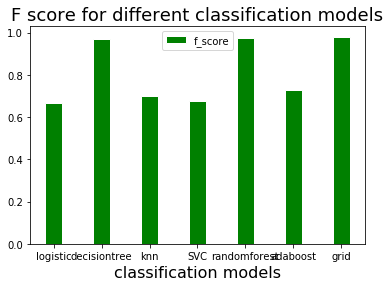

In [29]:
classificationmodels=['logistic','decisiontree','knn','SVC','randomforest','adaboost','grid']
f_score=['f_score']
index = np.arange(len(classificationmodels))
bar_width=0.35
r=[0.6685,0.9677,0.7000,0.6749,0.9752,0.7295,0.9802]
plt.bar(index,r,bar_width,color='green',edgecolor='white')
plt.xticks(index, classificationmodels)
plt.xlabel('classification models', fontsize=16)
plt.title('F score for different classification models',fontsize=18)
plt.legend(f_score)
plt.show()

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cvscores_rf = cross_val_score(rfc, X, y, cv=10)
print(cv_scores_rf)
print("Mean 10-Fold : {}".format(np.mean(cv_r2_scores_rf)))

NameError: name 'cv_scores_rf' is not defined

In [33]:
from sklearn.model_selection import KFold # import KFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
#y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2,random_state=20) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
#KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=20, shuffle=False)
